In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
import random
import re
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download("stopwords")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [2]:
tv_shows = pd.read_csv(r"C:\Users\Mayank\OneDrive\Desktop\project\tv_shows.csv")

In [3]:
tv_shows

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008.0,18+,9.4/10,100/100,1,0,0,0,1
1,1,2,Stranger Things,2016.0,16+,8.7/10,96/100,1,0,0,0,1
2,2,3,Attack on Titan,2013.0,18+,9.0/10,95/100,1,1,0,0,1
3,3,4,Better Call Saul,2015.0,18+,8.8/10,94/100,1,0,0,0,1
4,4,5,Dark,2017.0,16+,8.8/10,93/100,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5363,5363,5713,Paradise Islands,2017.0,NaN,NaN,10/100,0,0,0,1,1
5364,5364,5714,Mexico Untamed,2018.0,NaN,NaN,10/100,0,0,0,1,1
5365,5365,5715,Wild Centeral America,2020.0,NaN,NaN,10/100,0,0,0,1,1
5366,5366,5716,Wild Russia,2018.0,NaN,NaN,10/100,0,0,0,1,1


In [4]:
tv_shows.shape

(5368, 12)

### Data Cleaning

In [5]:
tv_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5368 entries, 0 to 5367
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5368 non-null   int64  
 1   ID               5368 non-null   int64  
 2   Title            5368 non-null   object 
 3   Year             5367 non-null   float64
 4   Age              3241 non-null   object 
 5   IMDb             4406 non-null   object 
 6   Rotten Tomatoes  5368 non-null   object 
 7   Netflix          5368 non-null   int64  
 8   Hulu             5368 non-null   int64  
 9   Prime Video      5368 non-null   int64  
 10  Disney+          5368 non-null   int64  
 11  Type             5368 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 503.4+ KB


##### Deleting the Null row

In [6]:
tv_shows = tv_shows.dropna()

In [7]:
tv_shows.shape

(3206, 12)

In [8]:
tv_shows.columns

Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type'],
      dtype='object')

In [9]:
tv_shows.drop(['Unnamed: 0', 'ID', 'Type'], inplace = True, axis = 1)

In [10]:
tv_shows

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,Breaking Bad,2008.0,18+,9.4/10,100/100,1,0,0,0
1,Stranger Things,2016.0,16+,8.7/10,96/100,1,0,0,0
2,Attack on Titan,2013.0,18+,9.0/10,95/100,1,1,0,0
3,Better Call Saul,2015.0,18+,8.8/10,94/100,1,0,0,0
4,Dark,2017.0,16+,8.8/10,93/100,1,0,0,0
...,...,...,...,...,...,...,...,...,...
5336,Disney Family Sundays,2019.0,all,5.6/10,31/100,0,0,0,1
5339,Wild Chile,2018.0,7+,7.5/10,30/100,0,0,0,1
5340,Howie Mandel's Animals Doing Things,2018.0,all,3.2/10,30/100,0,0,0,1
5341,The Big Fib,2020.0,all,5.4/10,29/100,0,0,0,1


##### Removing the '/100' from the IMDb and Rotten Tomatoes

In [11]:
tv_shows['Rotten Tomatoes'] = tv_shows['Rotten Tomatoes'].str.replace('/100', " ")
tv_shows['IMDb'] = tv_shows['IMDb'].str.replace('/10', " ")

In [12]:
tv_shows['Rotten Tomatoes']

0       100 
1        96 
2        95 
3        94 
4        93 
        ... 
5336     31 
5339     30 
5340     30 
5341     29 
5342     28 
Name: Rotten Tomatoes, Length: 3206, dtype: object

##### Converting the Datatype from String to Float

In [13]:
tv_shows['Rotten Tomatoes'] = tv_shows['Rotten Tomatoes'].astype('float')
tv_shows['Rotten Tomatoes']

0       100.0
1        96.0
2        95.0
3        94.0
4        93.0
        ...  
5336     31.0
5339     30.0
5340     30.0
5341     29.0
5342     28.0
Name: Rotten Tomatoes, Length: 3206, dtype: float64

In [14]:
tv_shows['IMDb'] = tv_shows['IMDb'].astype('float')
tv_shows['IMDb']

0       9.4
1       8.7
2       9.0
3       8.8
4       8.8
       ... 
5336    5.6
5339    7.5
5340    3.2
5341    5.4
5342    7.7
Name: IMDb, Length: 3206, dtype: float64

In [15]:
tv_shows.head(10)

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,Breaking Bad,2008.0,18+,9.4,100.0,1,0,0,0
1,Stranger Things,2016.0,16+,8.7,96.0,1,0,0,0
2,Attack on Titan,2013.0,18+,9.0,95.0,1,1,0,0
3,Better Call Saul,2015.0,18+,8.8,94.0,1,0,0,0
4,Dark,2017.0,16+,8.8,93.0,1,0,0,0
5,Avatar: The Last Airbender,2005.0,7+,9.3,93.0,1,0,1,0
6,Peaky Blinders,2013.0,18+,8.8,93.0,1,0,0,0
7,The Walking Dead,2010.0,18+,8.2,93.0,1,0,0,0
8,Black Mirror,2011.0,18+,8.8,92.0,1,0,0,0
9,The Queen's Gambit,2020.0,18+,8.6,92.0,1,0,0,0


##### Creating the heat map for seeing the correlation between each columns

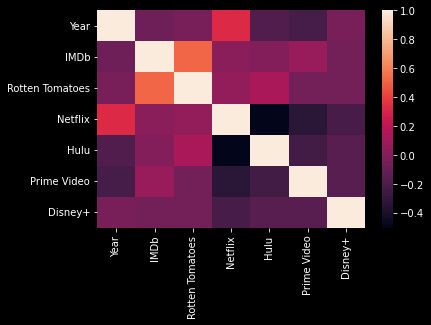

In [49]:
plt.style.use('dark_background')
sns.heatmap(tv_shows.corr())
plt.show()

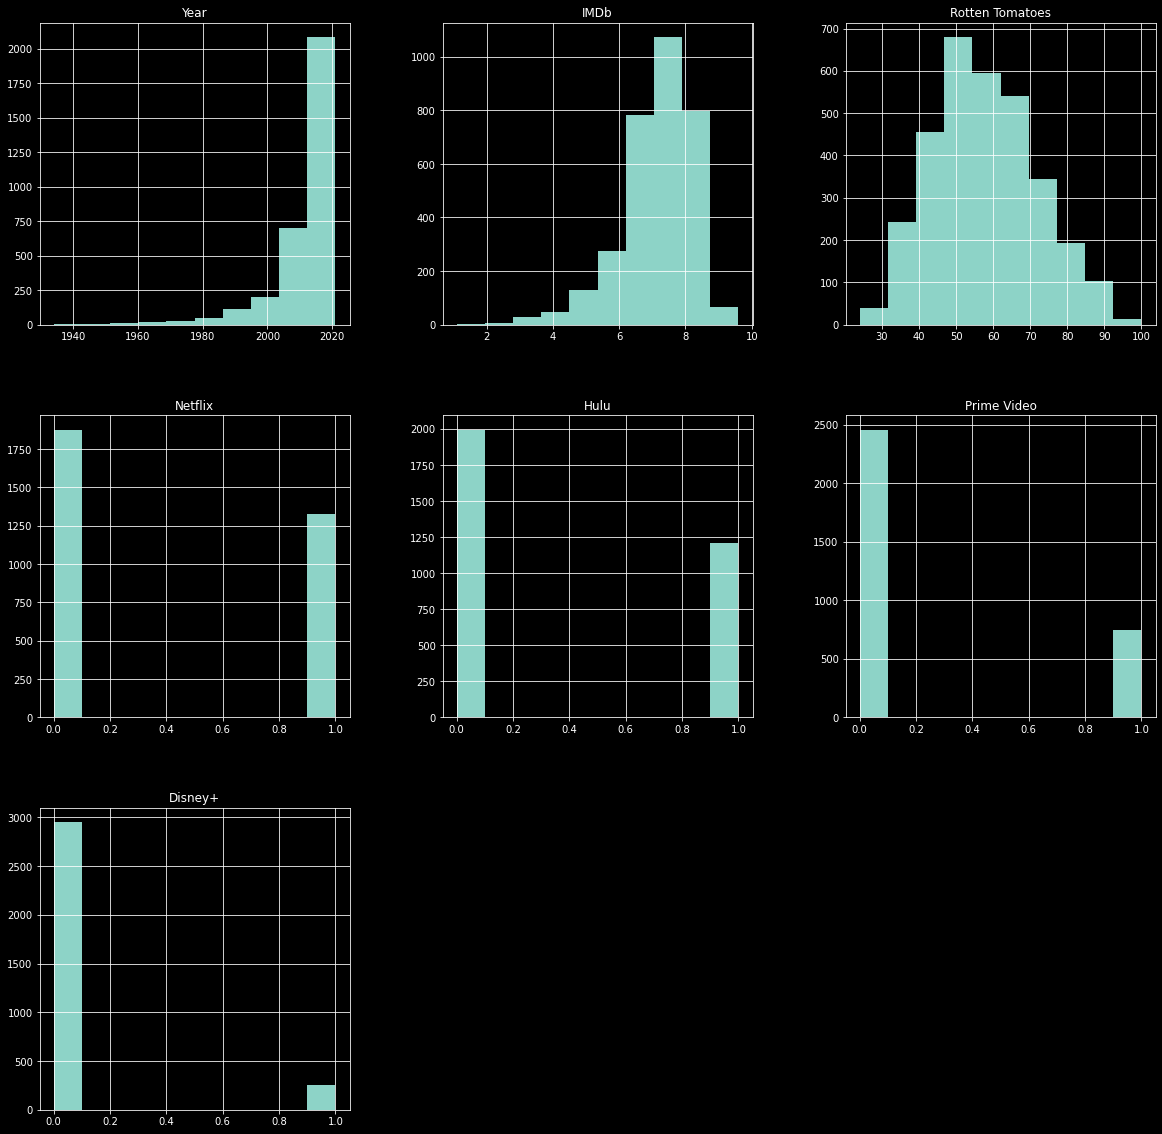

In [50]:
histogram = tv_shows.hist(figsize = (20, 20))

In [51]:
age_count = tv_shows['Age'].value_counts()
a = age_count.index
b = age_count.values
age_count = pd.DataFrame({'age': a, 'Shows': b})
age_count

,age,Shows
0,16+,986
1,18+,852
2,7+,824
3,all,535
4,13+,9


In [52]:
fig = px.bar(tv_shows, x="Netflix", y="Rotten Tomatoes", color="Age", title="No of Data present in the Netflix ")
fig.show()

In [53]:
fig = px.bar(tv_shows, x="Hulu", y="Rotten Tomatoes", color="Age", title="No of Data present in the Hulu ")
fig.show()

In [54]:
fig = px.bar(tv_shows, x="Prime Video", y="Rotten Tomatoes", color="Age", title="No of Data present in the Prime Video")
fig.show()

In [55]:
fig = px.bar(tv_shows, x="Disney+", y="Rotten Tomatoes", color="Age", title="No of Data present in the Disney+ ")
fig.show()

## 1) Analysis on the dataset by age

In [56]:
age_count = tv_shows['Age'].value_counts()
a = age_count.index
b = age_count.values

age_count = pd.DataFrame({'age': a, 'Shows': b})
age_count

,age,Shows
0,16+,986
1,18+,852
2,7+,824
3,all,535
4,13+,9


In [57]:
fig = px.pie(age_count, values='Shows', names='age')
fig.show()

### The above Pie chart  showing the percentage of the Age limit of total TV shows count

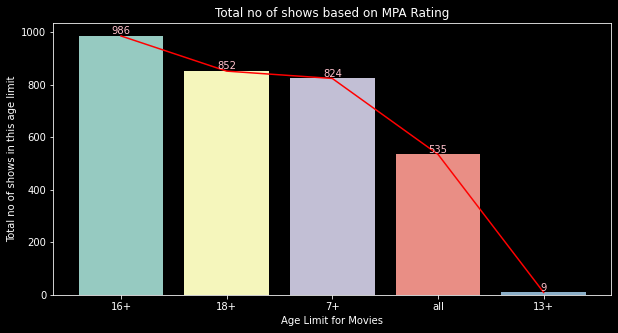

In [58]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x = a, y = b)
plt.xlabel('Age Limit for Movies')
plt.ylabel('Total no of shows in this age limit')
plt.title('Total no of shows based on MPA Rating')
plt.plot(b, color = 'r')
ax.bar_label(ax.containers[0], color = 'pink' )
plt.show()



### The above bar grap showing the Total number of TV Shows release in the different age limit
#### The y-axis showing the no of shows and the x-axis is showing the Age limit

[Text(0, 0, '481'),
 Text(0, 0, '379'),
 Text(0, 0, '296'),
 Text(0, 0, '169'),
 Text(0, 0, '3')]

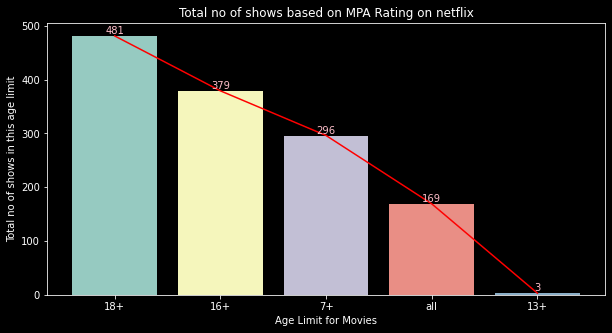

In [59]:
age_netflix = tv_shows[tv_shows.Netflix==1]
age_netflix = age_netflix['Age'].value_counts()
a = age_netflix.index
b = age_netflix.values
age_netflix = pd.DataFrame({'age': a, 'Shows': b})
age_netflix

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x = a, y = b)
plt.xlabel('Age Limit for Movies')
plt.ylabel('Total no of shows in this age limit')
plt.title('Total no of shows based on MPA Rating on netflix')

plt.plot(b, color = 'r')
ax.bar_label(ax.containers[0], color = 'pink' )

### The above bar grap showing the Total number of TV Shows release in the different age limit on Netflix
#### The y-axis showing the no of shows and the x-axis is showing the Age limit

[Text(0, 0, '498'),
 Text(0, 0, '324'),
 Text(0, 0, '260'),
 Text(0, 0, '123'),
 Text(0, 0, '6')]

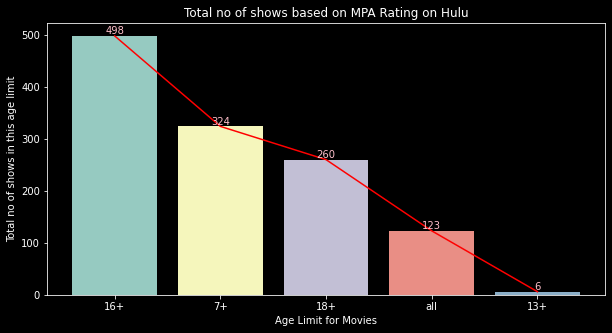

In [60]:
age_hulu = tv_shows[tv_shows['Hulu']==1]
age_hulu = age_hulu['Age'].value_counts()
a = age_hulu.index
b = age_hulu.values
age_hulu = pd.DataFrame({'age': a, 'Shows': b})
age_hulu

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x = a, y = b)
plt.xlabel('Age Limit for Movies')
plt.ylabel('Total no of shows in this age limit')
plt.title('Total no of shows based on MPA Rating on Hulu')
plt.plot(b, color = 'r')
ax.bar_label(ax.containers[0], color = 'pink' )

### The above bar grap showing the Total number of TV Shows release in the different age limit on Hulu
#### The y-axis showing the no of shows and the x-axis is showing the Age limit

[Text(0, 0, '210'),
 Text(0, 0, '206'),
 Text(0, 0, '167'),
 Text(0, 0, '164'),
 Text(0, 0, '2')]

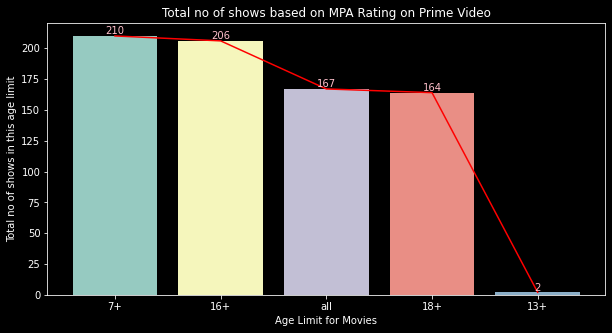

In [61]:
age_prime_video = tv_shows[tv_shows['Prime Video']==1]
age_prime_video = age_prime_video['Age'].value_counts()
a = age_prime_video.index
b = age_prime_video.values
age_prime_video = pd.DataFrame({'age': a, 'Shows': b})
age_prime_video

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x = a, y = b)
plt.xlabel('Age Limit for Movies')
plt.ylabel('Total no of shows in this age limit')
plt.title('Total no of shows based on MPA Rating on Prime Video')
plt.plot(b, color = 'r')
ax.bar_label(ax.containers[0], color = 'pink' )

### The above bar grap showing the Total number of TV Shows release in the different age limit on Prime Video
#### The y-axis showing the no of shows and the x-axis is showing the Age limit

[Text(0, 0, '126'), Text(0, 0, '109'), Text(0, 0, '20'), Text(0, 0, '2')]

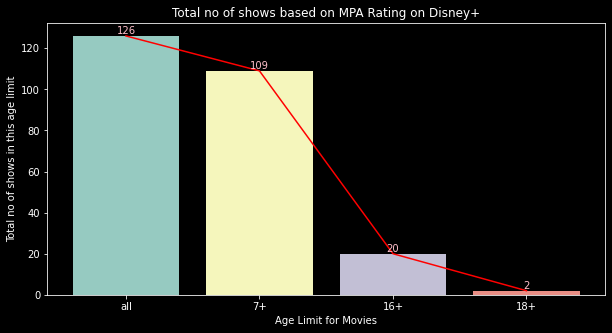

In [62]:
age_disney = tv_shows[tv_shows['Disney+']==1]
age_disney = age_disney['Age'].value_counts()
a = age_disney.index
b = age_disney.values
age_disney = pd.DataFrame({'age': a, 'Shows': b})
age_disney

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x = a, y = b)

plt.xlabel('Age Limit for Movies')
plt.ylabel('Total no of shows in this age limit')
plt.title('Total no of shows based on MPA Rating on Disney+')
plt.plot(b, color = 'r')
ax.bar_label(ax.containers[0], color = 'pink' )

### The above bar grap showing the Total number of TV Shows release in the different age limit on Disney+
#### The y-axis showing the no of shows and the x-axis is showing the Age limit

In [63]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=tv_shows["Age"],
    y=tv_shows["Netflix"],
    name='Netflix',
    marker_color='Red'
))
fig.add_trace(go.Bar(
    x=tv_shows["Age"],
    y=tv_shows["Hulu"],
    name='Hulu',
    marker_color='yellow'
))
fig.add_trace(go.Bar(
    x=tv_shows["Age"],
    y=tv_shows["Prime Video"],
    name='Prime Video',
    marker_color='Green',))
fig.add_trace(go.Bar(
    x=tv_shows["Age"],
    y=tv_shows["Disney+"],
    name='Disney+',
    marker_color='purple'
))
fig.update_layout(barmode='group', xaxis_tickangle=-40)
fig.show()

### The above comparison bar grap showing the Total number of TV Shows release in the different age group wrt to all the streaming services
#### The y-axis showing the no of shows and the x-axis is showing the Age limit.

## 2) Analysis based on Title

In [64]:
titles = tv_shows['Title'].values
text = ''.join(titles)
text = re.sub(r'[^\w\s]','',text)

In [65]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(text)

In [66]:
words = []

for word in tokens:
    words.append(word.lower())
    
stopwords = nltk.corpus.stopwords.words('english')

In [67]:
words_new = []
for word in words:
    if word not in stopwords:
        words_new.append(word)
        
freq_dist = nltk.FreqDist(words_new)

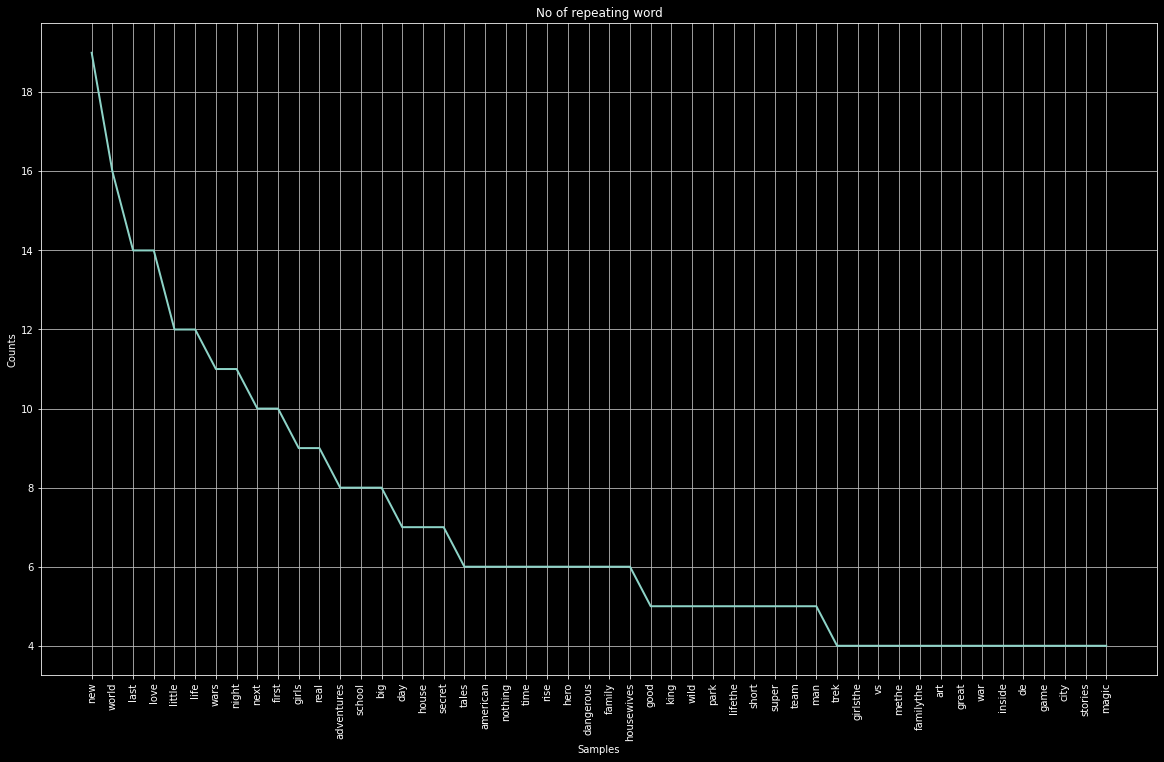

<AxesSubplot:title={'center':'No of repeating word'}, xlabel='Samples', ylabel='Counts'>

In [68]:
plt.subplots(figsize=(20,12))
plt.title('No of repeating word')
freq_dist.plot(50)

### The above graph showing that the higest number of word used in the Titles

In [69]:
res=' '.join([i for i in words_new if not i.isdigit()])

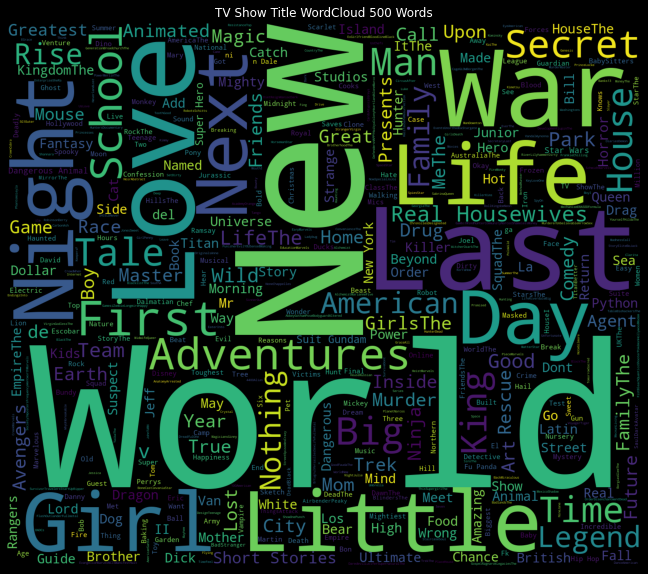

In [70]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          max_words=500,
                          width=1400,
                          height=1200
                         ).generate(text)


plt.imshow(wordcloud)
plt.title('TV Show Title WordCloud 500 Words')
plt.axis('off')
plt.show()

### The above graph is showing the frequency of the Word, the bold and large size word showing the higest frequency and the normal and small size is showing lowest frequency word in the titles

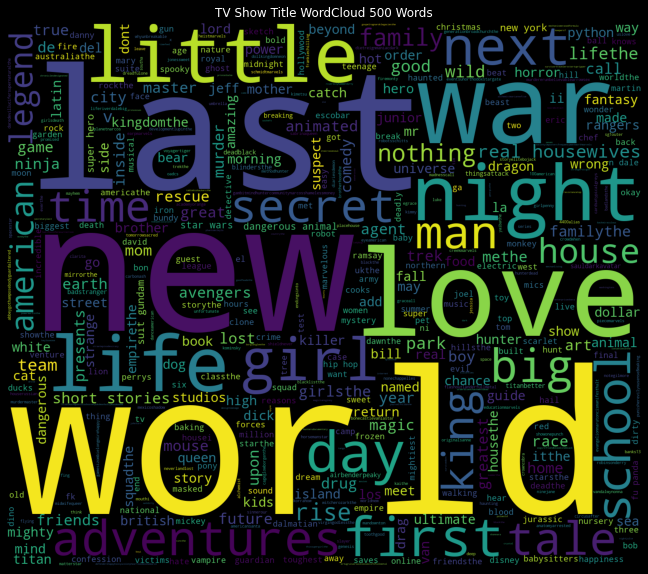

In [71]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          max_words=500,
                          width=1400,
                          height=1200
                         ).generate(res)


plt.imshow(wordcloud)
plt.title('TV Show Title WordCloud 500 Words')
plt.axis('off')
plt.show()

### The above graph is showing the frequency of the Word, the bold and large size word showing the higest frequency of word and the normal and small size is showing lowest frequency word

# 3) Analyzing the year of release of shows

Text(0.5, 1.0, 'Movie Density')

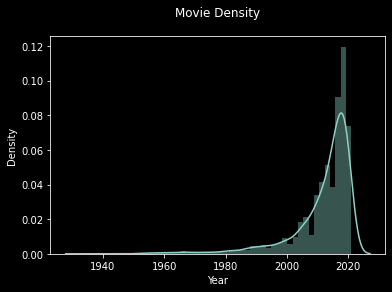

In [72]:
sns.distplot(tv_shows["Year"])
plt.title('Movie Density', pad = 20)

### The above graph shows the year and frequency of the shows 
### on the x-axis we have the release year and the y-axis we have density (or frequency) of the shows
### We can analyze that from the year 2010 the frequency of the shows increased

# 4) Analysis based on IMDb rating


In [73]:
tv_shows['IMDb'].mean()
tv_shows

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,Breaking Bad,2008.0,18+,9.4,100.0,1,0,0,0
1,Stranger Things,2016.0,16+,8.7,96.0,1,0,0,0
2,Attack on Titan,2013.0,18+,9.0,95.0,1,1,0,0
3,Better Call Saul,2015.0,18+,8.8,94.0,1,0,0,0
4,Dark,2017.0,16+,8.8,93.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
5336,Disney Family Sundays,2019.0,all,5.6,31.0,0,0,0,1
5339,Wild Chile,2018.0,7+,7.5,30.0,0,0,0,1
5340,Howie Mandel's Animals Doing Things,2018.0,all,3.2,30.0,0,0,0,1
5341,The Big Fib,2020.0,all,5.4,29.0,0,0,0,1


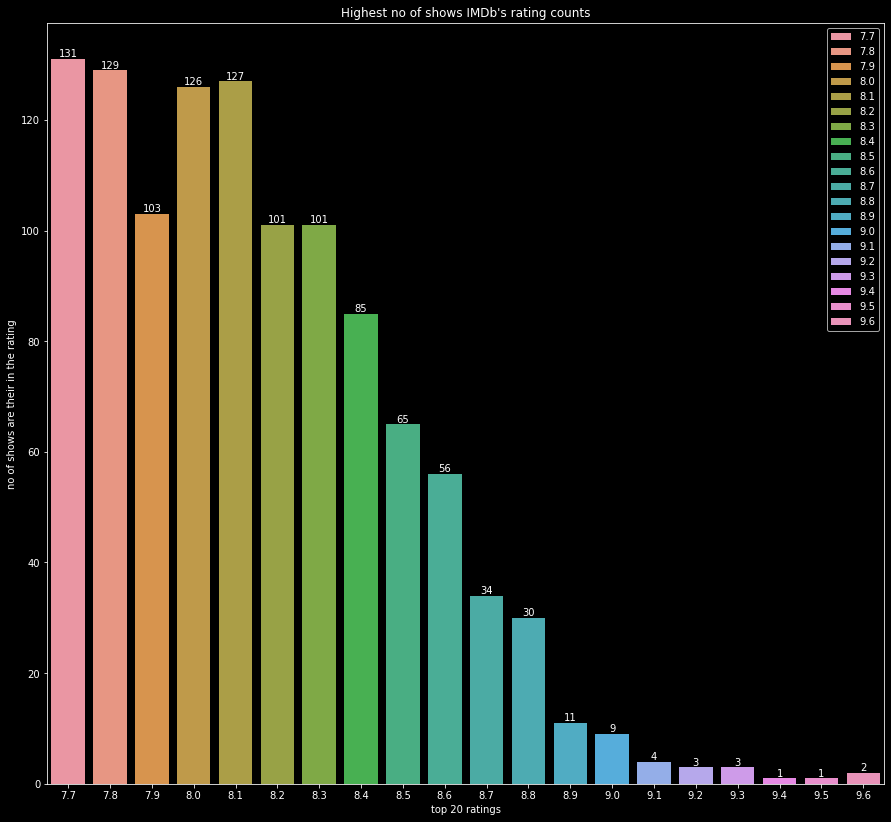

In [82]:
IMDb_count = tv_shows.IMDb.value_counts().sort_index().tail(20)
plt.figure(figsize = (15, 14))
plt.xlabel('top 20 ratings')
plt.ylabel('no of shows are their in the rating')
plt.title("Highest no of shows IMDb's rating counts")
ax = sns.barplot(x = IMDb_count.index, y = IMDb_count.values, hue=IMDb_count.index, dodge=False)
# ax.bar_label(ax.containers[0], color = 'pink',  )
for i in ax.containers:
    ax.bar_label(i,)

### The above graph shows the top-20 IMDb's rating of no of movies present in the dataset

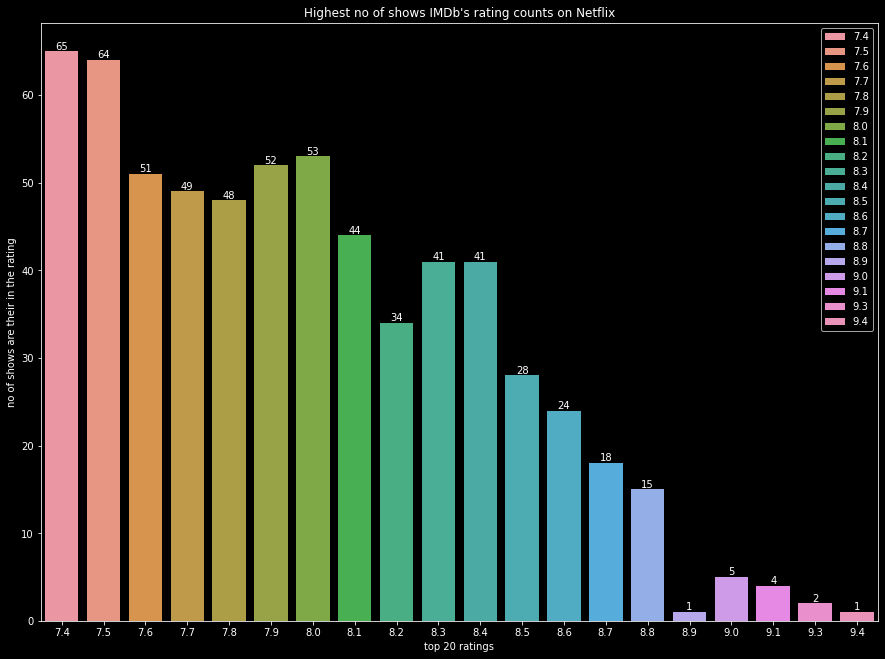

In [83]:
netflix_imdb = tv_shows[tv_shows['Netflix'] == 1]
netflix_imdb = netflix_imdb['IMDb'].value_counts().sort_index().tail(20)
plt.figure(figsize = (15, 11))
plt.xlabel('top 20 ratings')
plt.ylabel('no of shows are their in the rating')
plt.title("Highest no of shows IMDb's rating counts on Netflix")
ax = sns.barplot(x = netflix_imdb.index, y = netflix_imdb.values, hue=netflix_imdb.index, dodge=False)
# ax.bar_label(ax.containers[0], color = 'pink',  )
for i in ax.containers:
    ax.bar_label(i,)

### The above graph shows the top-20 IMDb's rating of no of movies present in the Netflix

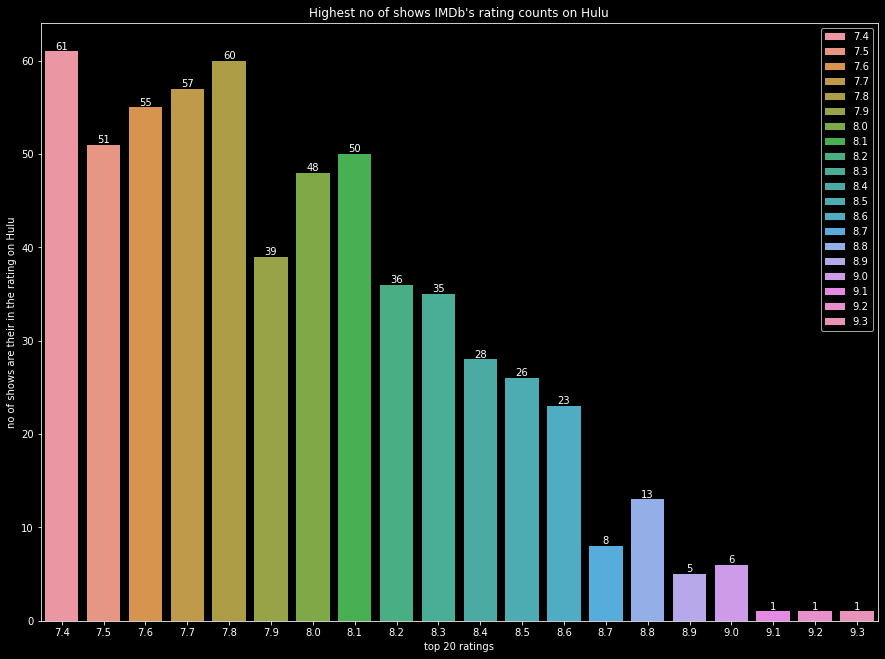

In [87]:
Hulu_imdb = tv_shows[tv_shows['Hulu'] == 1]
Hulu_imdb = Hulu_imdb['IMDb'].value_counts().sort_index().tail(20)
plt.figure(figsize = (15, 11))
plt.xlabel('top 20 ratings')
plt.ylabel('no of shows are their in the rating on Hulu')
plt.title("Highest no of shows IMDb's rating counts on Hulu")
ax = sns.barplot(x = Hulu_imdb.index, y = Hulu_imdb.values, hue=Hulu_imdb.index, dodge=False)
# ax.bar_label(ax.containers[0], color = 'pink',  )
for i in ax.containers:
    ax.bar_label(i,)

### The above graph shows the top-20 IMDb's rating of no of movies present in the Hulu

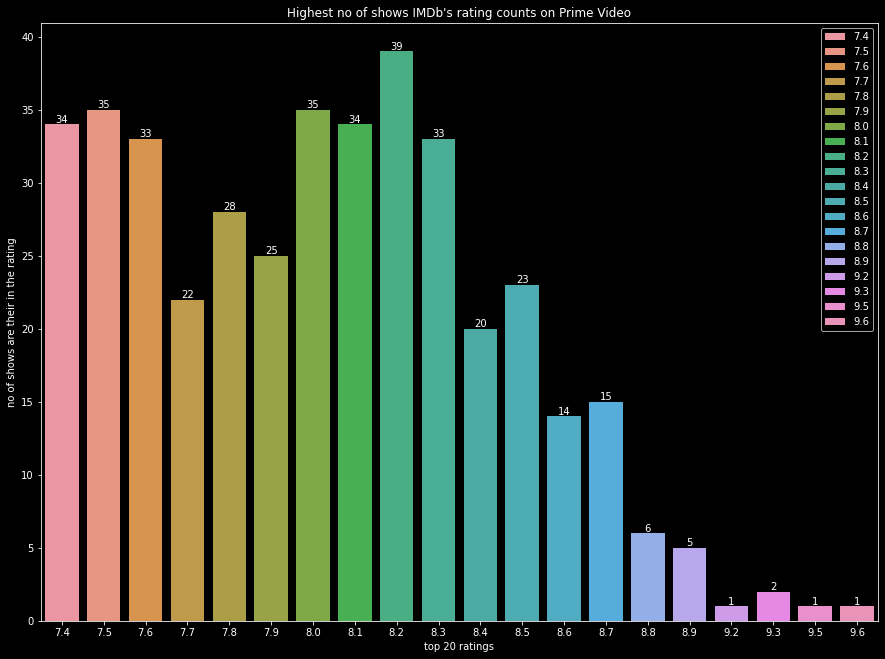

In [88]:
prime_imdb = tv_shows[tv_shows['Prime Video'] == 1]
prime_imdb = prime_imdb['IMDb'].value_counts().sort_index().tail(20)
plt.figure(figsize = (15, 11))
plt.xlabel('top 20 ratings')
plt.ylabel('no of shows are their in the rating')
plt.title("Highest no of shows IMDb's rating counts on Prime Video")
ax = sns.barplot(x = prime_imdb.index, y = prime_imdb.values, hue=prime_imdb.index, dodge=False)
# ax.bar_label(ax.containers[0], color = 'pink',  )
for i in ax.containers:
    ax.bar_label(i,)

### The above graph shows the top-20 IMDb's rating of no of movies present in the Prime Video

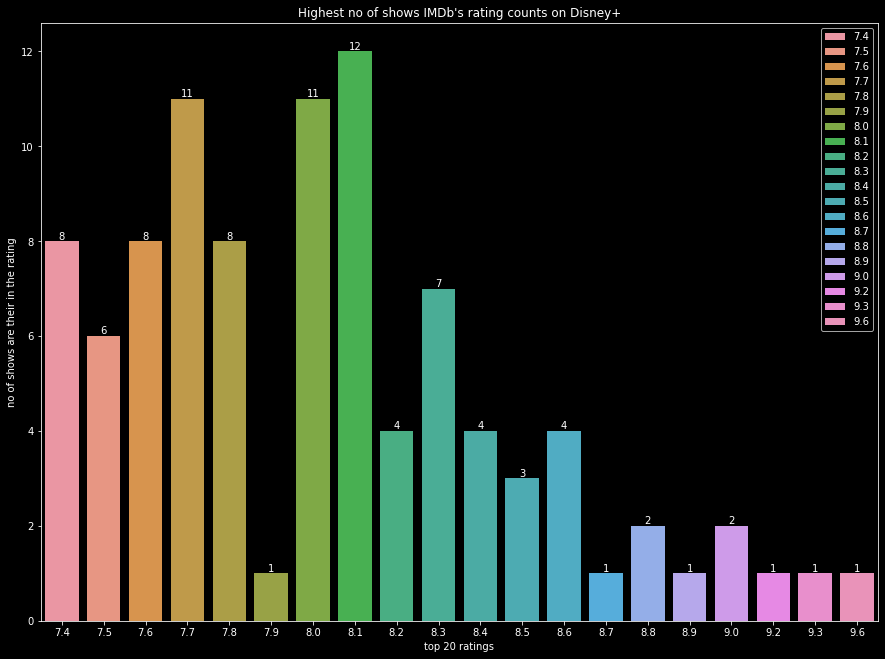

In [86]:
Disney_imdb = tv_shows[tv_shows['Disney+'] == 1]
Disney_imdb = Disney_imdb['IMDb'].value_counts().sort_index().tail(20)
plt.figure(figsize = (15, 11))
plt.xlabel('top 20 ratings')
plt.ylabel('no of shows are their in the rating')
plt.title("Highest no of shows IMDb's rating counts on Disney+")
ax = sns.barplot(x = Disney_imdb.index, y = Disney_imdb.values, hue=Disney_imdb.index, dodge=False)
# ax.bar_label(ax.containers[0], color = 'pink',  )
for i in ax.containers:
    ax.bar_label(i,)

### The above graph shows the top-20 IMDb's rating of no of movies present in the Disney+

In [79]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=netflix_imdb.index,
    y=netflix_imdb.values,
    name='Netflix',
    marker_color='Red'
))
# fig.update_traces(width=0.3)
fig.add_trace(go.Bar(
    x=Hulu_imdb.index,
    y=Hulu_imdb.values,
    name='Hulu',
    marker_color='yellow'
))
# fig.update_traces(width=0.3)
fig.add_trace(go.Bar(
    x=prime_imdb.index,
    y=prime_imdb.values,
    name='Prime Video',
    marker_color='Green'
))
# fig.update_traces(width=0.3)
fig.add_trace(go.Bar(
    x=Disney_imdb.index,
    y=Disney_imdb.values,
    name='Disney+',
    marker_color='purple'
))
# fig.update_traces(width=0.3)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.update_layout(barmode='group', xaxis_tickangle=-40)

fig.show()

### Comparison between the streaming services Top-20 IMDb's ratings with no of Movies

# 5) Analysis based on Rotten Tomatoes rating

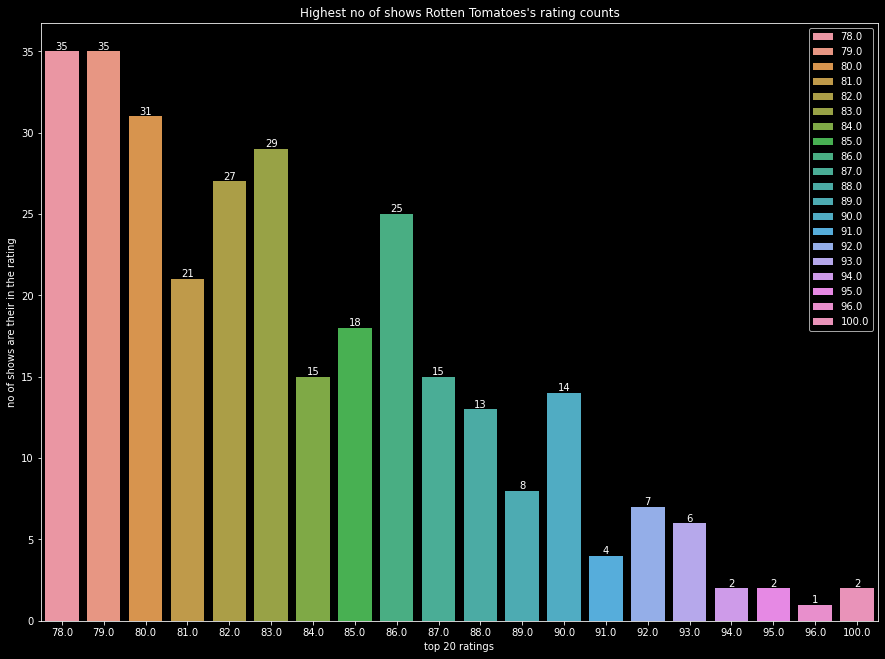

In [80]:
Rottentomatoes_count = tv_shows['Rotten Tomatoes'].value_counts().sort_index().tail(20)
Rottentomatoes_count.values.sort
plt.figure(figsize = (15, 11))
plt.xlabel('top 20 ratings')
plt.ylabel('no of shows are their in the rating')
plt.title("Highest no of shows Rotten Tomatoes's rating counts")
ax = sns.barplot(x = Rottentomatoes_count.index, y = Rottentomatoes_count.values, hue=Rottentomatoes_count.index, dodge=False)
# ax.bar_label(ax.containers[0], color = 'pink',  )
for i in ax.containers:
    ax.bar_label(i,)

### The above graph shows the top-20 Rotten Tomatoes rating of no of movies present in the dataset

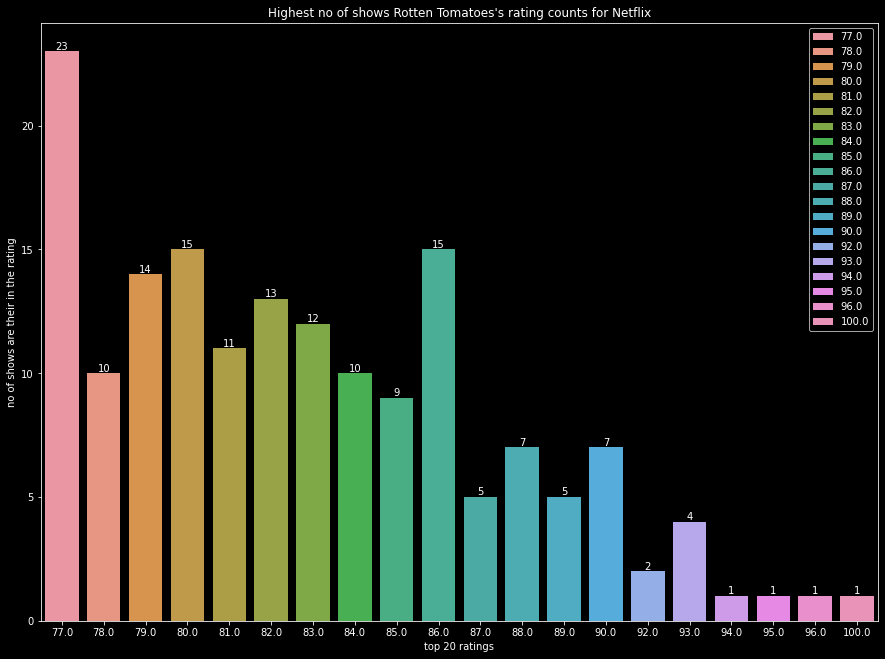

In [91]:
netflix_rotten = tv_shows[tv_shows['Netflix'] == 1]
netflix_rotten = netflix_rotten['Rotten Tomatoes'].value_counts().sort_index().tail(20)
plt.figure(figsize = (15, 11))
plt.xlabel('top 20 ratings')
plt.ylabel('no of shows are their in the rating')
plt.title("Highest no of shows Rotten Tomatoes's rating counts for Netflix")
ax = sns.barplot(x = netflix_rotten.index, y = netflix_rotten.values, hue=netflix_rotten.index, dodge=False)
# ax.bar_label(ax.containers[0], color = 'pink',  )
for i in ax.containers:
    ax.bar_label(i,)

### The above graph shows the top-20 Rotten Tomatoes rating of no of movies present in the Netflix

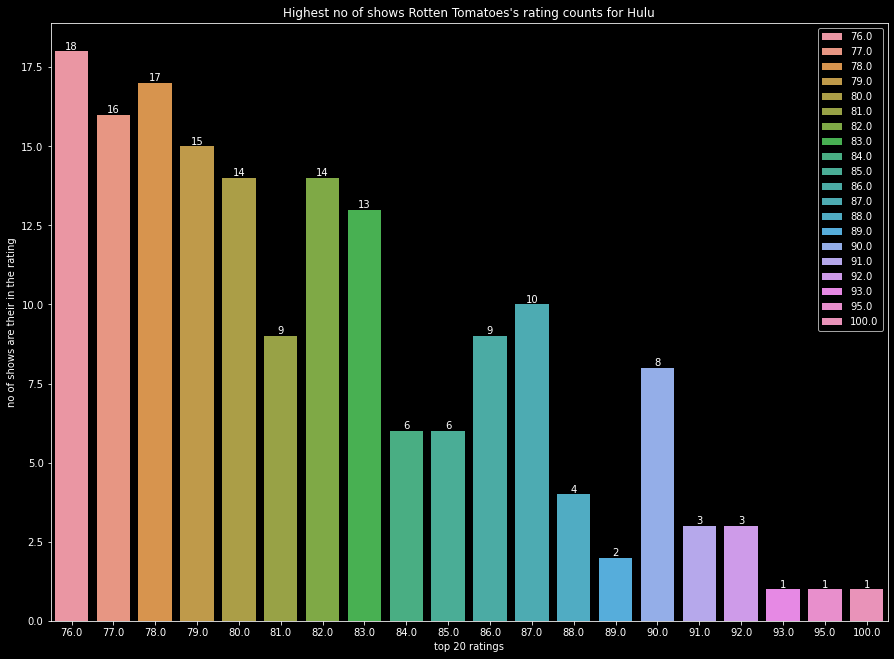

In [94]:
Hulu_rotten = tv_shows[tv_shows['Hulu'] == 1]
Hulu_rotten = Hulu_rotten['Rotten Tomatoes'].value_counts().sort_index().tail(20)
plt.figure(figsize = (15, 11))
plt.xlabel('top 20 ratings')
plt.ylabel('no of shows are their in the rating')
plt.title("Highest no of shows Rotten Tomatoes's rating counts for Hulu")
ax = sns.barplot(x = Hulu_rotten.index, y = Hulu_rotten.values, hue=Hulu_rotten.index, dodge=False)
# ax.bar_label(ax.containers[0], color = 'pink',  )
for i in ax.containers:
    ax.bar_label(i,)

### The above graph shows the top-20 Rotten Tomatoes rating of no of movies present in the Hulu

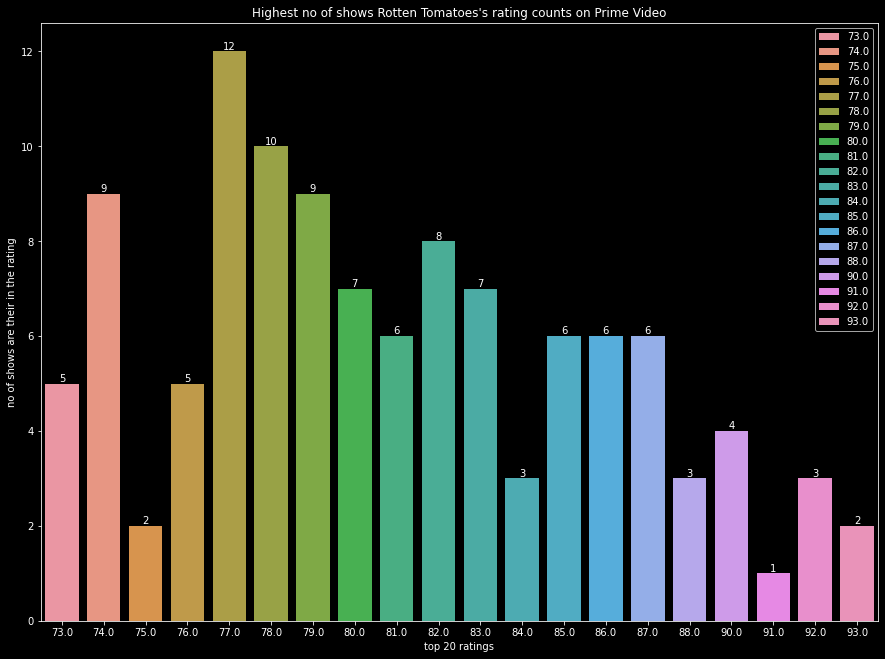

In [97]:
prime_rotten = tv_shows[tv_shows['Prime Video'] == 1]
prime_rotten = prime_rotten['Rotten Tomatoes'].value_counts().sort_index().tail(20)
plt.figure(figsize = (15, 11))
plt.xlabel('top 20 ratings')
plt.ylabel('no of shows are their in the rating')
plt.title("Highest no of shows Rotten Tomatoes's rating counts on Prime Video")
ax = sns.barplot(x = prime_rotten.index, y = prime_rotten.values, hue=prime_rotten.index, dodge=False)
# ax.bar_label(ax.containers[0], color = 'pink',  )
for i in ax.containers:
    ax.bar_label(i,)

### The above graph shows the top-20 Rotten Tomatoes rating of no of movies present in the Prime Video

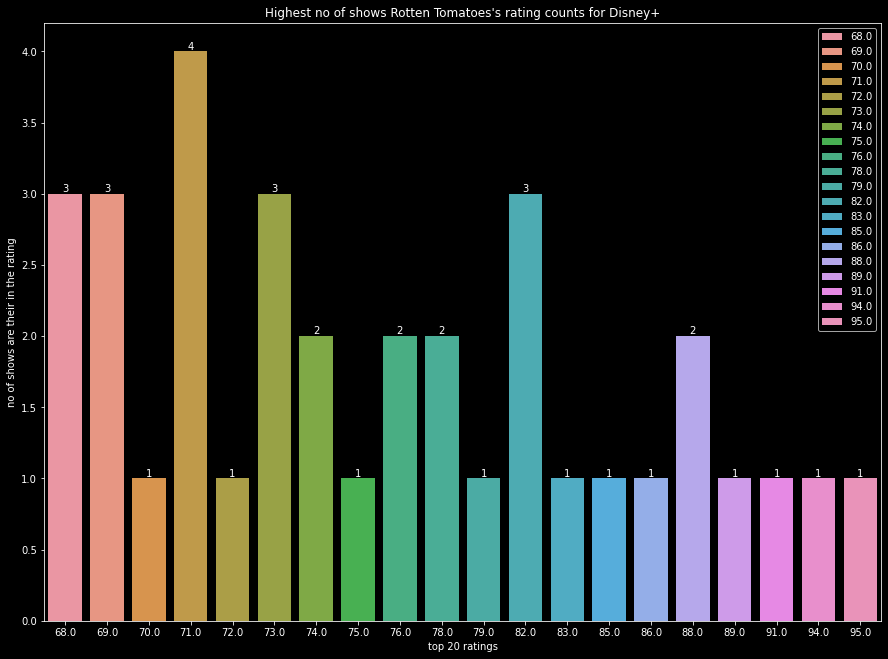

In [92]:
Disney_rotten = tv_shows[tv_shows['Disney+'] == 1]
Disney_rotten = Disney_rotten['Rotten Tomatoes'].value_counts().sort_index().tail(20)
plt.figure(figsize = (15, 11))
plt.xlabel('top 20 ratings')
plt.ylabel('no of shows are their in the rating')
plt.title("Highest no of shows Rotten Tomatoes's rating counts for Disney+")
ax = sns.barplot(x = Disney_rotten.index, y = Disney_rotten.values, hue=Disney_rotten.index, dodge=False)
# ax.bar_label(ax.containers[0], color = 'pink',  )
for i in ax.containers:
    ax.bar_label(i,)

### The above graph shows the top-20 IMDb's rating of no of movies present in the Disney+

In [98]:

fig = go.Figure()
  
fig.add_trace(go.Bar(
    x=netflix_rotten.index,
    y=netflix_rotten.values,
    name='Netflix',
    marker_color='Red'
    
))
fig.update_traces(width=0.3)
fig.add_trace(go.Bar(
    x=Hulu_rotten.index,
    y=Hulu_rotten.values,
    name='Hulu',
    marker_color='yellow'
))
fig.update_traces(width=0.3)
fig.add_trace(go.Bar(
    x=prime_rotten.index,
    y=prime_rotten.values,
    name='Prime Video',
    marker_color='Green'
))
fig.update_traces(width=0.3)
fig.add_trace(go.Bar(
    x=Disney_rotten.index,
    y=Disney_rotten.values,
    name='Disney+',
    marker_color='purple'
))
fig.update_traces(width=0.3)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.update_layout(barmode='group', xaxis_tickangle=-40)

fig.show()

In [99]:
tv_shows['Rotten Tomatoes'].mean()

57.67373674360574

#### Average of total Rotten Tomatoes

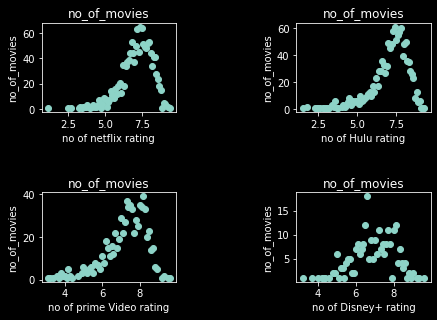

In [100]:


netflix_shows_imdb = tv_shows[tv_shows.Netflix==1]
netflix_shows_imdb = netflix_shows_imdb['IMDb'].value_counts()

a = netflix_shows_imdb.index
b = netflix_shows_imdb.values
netflix_shows_imdb = pd.DataFrame({'IMDb_rating': a, 'no_of_shows': b})

Hulu_shows_imdb = tv_shows[tv_shows.Hulu==1]
Hulu_shows_imdb = Hulu_shows_imdb['IMDb'].value_counts()
a1 = Hulu_shows_imdb.index
b1 = Hulu_shows_imdb.values
Hulu_shows_imdb = pd.DataFrame({'IMDb_rating': a1, 'no_of_shows': b1})

prime_shows_imdb = tv_shows[tv_shows['Prime Video']==1]
prime_shows_imdb = prime_shows_imdb['IMDb'].value_counts()
a2 = prime_shows_imdb.index
b2 = prime_shows_imdb.values
prime_shows_imdb = pd.DataFrame({'IMDb_rating': a2, 'no_of_shows': b2})

disney_shows_imdb = tv_shows[tv_shows['Disney+']==1]
disney_shows_imdb = disney_shows_imdb['IMDb'].value_counts()
a3 = disney_shows_imdb.index
b3 = disney_shows_imdb.values
disney_shows_imdb = pd.DataFrame({'IMDb_rating': a3, 'no_of_shows': b3})


plt.subplot(2, 2, 1)
plt.scatter(a, b)
plt.xlabel('no of netflix rating')
plt.ylabel('no_of_movies')
plt.title('no_of_movies')

plt.subplot(2, 2, 2)
plt.scatter(a1, b1)
plt.xlabel('no of Hulu rating')
plt.ylabel('no_of_movies')
plt.title('no_of_movies')

plt.subplot(2, 2, 3)
plt.scatter(a2 ,b2)
plt.xlabel('no of prime Video rating')
plt.ylabel('no_of_movies')
plt.title('no_of_movies')

plt.subplot(2, 2, 4)
plt.scatter(a3 ,b3)
plt.xlabel('no of Disney+ rating')
plt.ylabel('no_of_movies')
plt.title('no_of_movies')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.0, 
                    top=1.0, 
                    wspace=0.9, 
                    hspace=0.9)
plt.show()

In [101]:
a = tv_shows.groupby('Year')
a.value_counts('Age')
label = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']

In [102]:
new_data = tv_shows

In [103]:
import plotly.express as px
fig = px.sunburst(new_data, path=['Year', 'Age', ], width = 700, height = 500)
# fig.update_layout(margin = dict(t= 1, l=1, r= 1, b=1))

fig.show()

In [104]:
import plotly.express as px
fig = px.sunburst(new_data, path=['Year', 'Age', 'Title'],width = 1000, height = 1200)

fig.show()

### By Using the Movie density graph we can see that from 2010 The frequency of Movies is increased

##### By analysing the dataset on the basis of age we can say that the overall Shows Released in all Streaming platform  by age is the higest no. of. TV shows for age of 16+ so the market focuses on the 16+ viewer most
##### By Analysing the netflix we can say that The netflix is Releasing the 18+ shows more than the other platform so we can say that  the Netflix is more prior to 16+ population and other platform and focuses on all age criteria 

##### But Netflix has Highest tv shows than others so netflix has more Quantity
##### 

##### By Analysis based on IMDb rating we can conclude that the the average IMDb rating is 7.14 So the netflix rating based on average rating is higher which is good
##### where as the other platform also have good rating but the density of the tv shows is less

##### By Analysis based on Rotten Tomatoes rating we can conclude that the the average Rotten Tomatoes rating is 57.67
##### So the Hulu rating based on average rating is higher,
##### where as the other platform also have good rating but the density of the tv shows is less

##### By analysing the dataset we can conclude that Netflix has the 1328 tv shows and their average rating is also good  than others.

##### For Hulu we can conclude that Hulu has the 1211 tv shows but average rating is less than the netflix in terms of IMDb Rating

##### for prime Video it has 749  tv shows but average rating is less than the netflix and hulu in terms of IMDb Rating

##### and The Disney+ has 257 tv shows but average rating is less than the netflix, hulu and Prime Video in terms of IMDb Rating



##### Also Netflix has the 1328 tv shows and their average Rotten Tomatoes rating is also good than Prime Video and Disney+ but similar to Hulu.

##### For Hulu we can conclude that Hulu has the 1211 tv shows but average rating is Higest and greater than others

##### for prime Video it has 749 tv shows but average rating is less than the netflix and hulu in terms of Rotten Tomatoes Rating

##### and The Disney+ has 257 tv shows but average rating is less than the netflix, hulu and Prime Video in terms of Rotten Tomatoes Rating


#### But we can say that although Prime Video has less content but Their rating is high so The Prime Video is also good